# Imarticus Project : Employee Atrrition Prediction

Uncover the factors that cause employees to leave the organization and explore important questions such as ‘compare average monthly income by education and attrition’ or ‘is distance from home a case for attrition’?

Build classification models to predict which employee is likely to churn and help the business to devise policies and attract back the right talent.


## Step-1 :  Reading file and getting familiar with data

## 1.1 Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

## 1.2 Reading file

In [2]:
emp_data = pd.read_csv(r"C:\Users\Manish\Desktop\Imarticus Project\R project\R Project - Attrition\Attrition.csv")

## 1.3 checking data shape (row and column count) & observe few of records

In [3]:
emp_data.shape

(1470, 35)

In [4]:
emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
emp_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 1.4  Check for Null or missing values

In [6]:
emp_data.isnull().sum()  #...No null/missing values in dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# 👀Step -2 :  Exploratory Data Analysis (EDA) 👀

## 2.1 Check for distribution of target variable (Attrition column) 

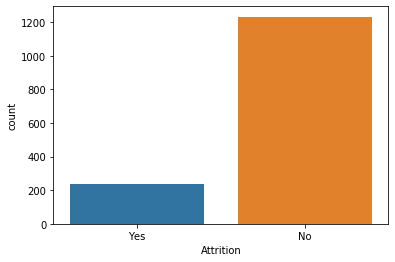

In [7]:
sns.countplot(emp_data['Attrition']) #..we have use here countplot function from seaborn library

👀 From above countplot now we know that there is class imbalnce for churnout and non-churnout employees

## 2.2 check for columns conatining single  unique category

In [8]:
emp_data.nunique().sort_values(ascending=True).reset_index(name= "Column unique count")

,index,Column unique count
0,Over18,1
1,StandardHours,1
2,EmployeeCount,1
3,Gender,2
4,Attrition,2
5,PerformanceRating,2
6,OverTime,2
7,MaritalStatus,3
8,Department,3
9,BusinessTravel,3


##### 👀 From above output now we know that columns "EmployeeCount ", "Over18 ","StandardHours" has single unique value. And hence do not has any impact on decision making.

## 2.3 Check for how Age and Attrition related

In [9]:
emp_data.groupby(["Attrition"]).Age.mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

#### ->Lets convert our target variable into numeric categories so we can plot distribution plot

In [10]:
emp_data.Attrition.replace({"Yes":1,"No":0}, inplace = True)

In [11]:
attri_yes = emp_data.loc[emp_data["Attrition"]==1]
attri_no = emp_data.loc[emp_data["Attrition"]==0]

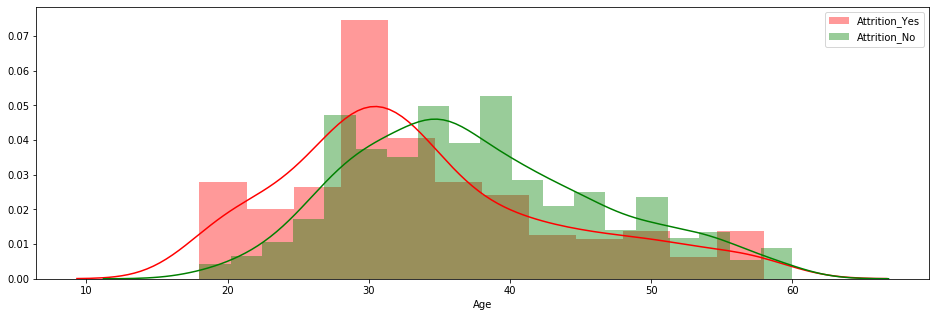

In [12]:
plt.figure(figsize=(16,5))
sns.distplot(attri_yes["Age"],color="red",label= "Attrition_Yes")
sns.distplot(attri_no["Age"], color="green", label= "Attrition_No")
plt.legend()

Lets covert Age column into two numeric categories like 1 for below 35 year and 2 for above 35 year

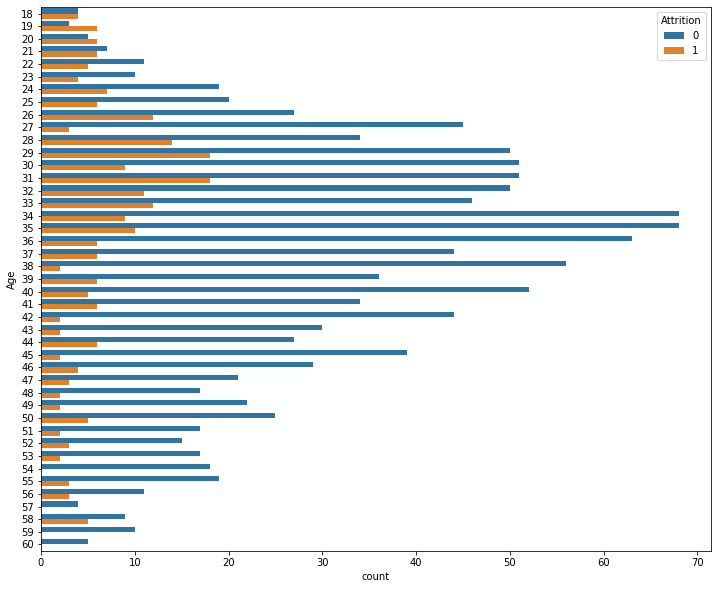

In [13]:
plt.figure(figsize=(12,10))
sns.countplot(y="Age", hue="Attrition", data=emp_data)

#### 🤷‍INSIGHT : From above visualization we can say employees having age below 35 years has more attrtition rate

## 2.4 How Attrition is related with Business Travel

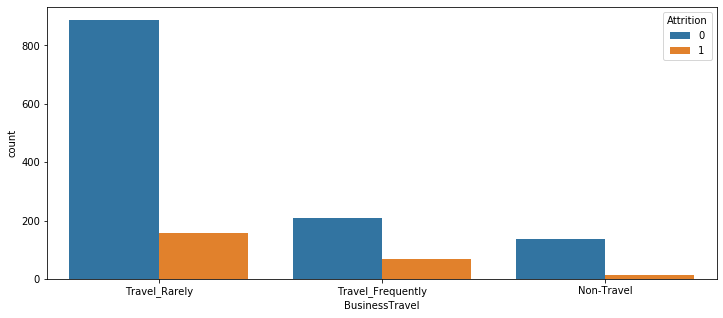

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x="BusinessTravel", hue="Attrition", data=emp_data)

#### 🤷‍INSIGHT : There is almost same pattern of Business Travel in churnout and nonchurnout employees .                                                                           Hence this feature has minimal impact on prediction.

## 2.5 Relation between Dailyrate and Attrition

##### while counting unique values we have seen there are 886 uniques in Dailyrate column and hence we will not visualization , instaed we will use min , max and average value to decide on pattern among attrtion

In [15]:
emp_data.groupby("Attrition").DailyRate.agg(["count","min","max","mean"])

,count,min,max,mean
Attrition,,,,
0,1233,102,1499,812.504461
1,237,103,1496,750.362869


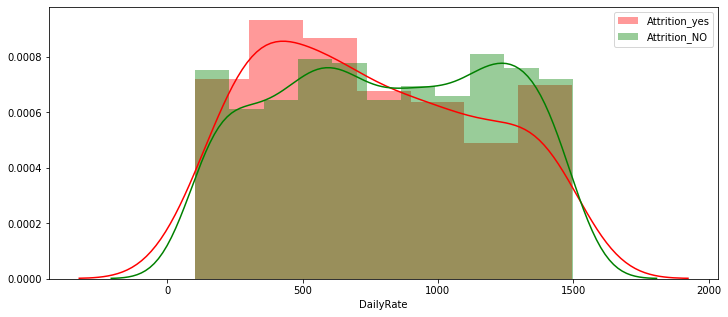

In [16]:
plt.figure(figsize=(12,5))
sns.distplot(attri_yes["DailyRate"],color="red",label= "Attrition_yes")
sns.distplot(attri_no["DailyRate"], color="green", label= "Attrition_NO")
plt.legend()

#### 🤷‍INSIGHT : There is same pattern of Daily Rate for both churnout and non-churnout employees. Hence this column has less impact on decision making

# 2.6 Department wise Attrition

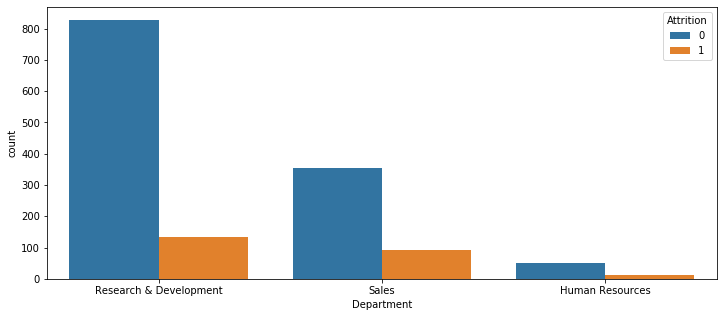

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(x="Department", hue="Attrition", data=emp_data, order = emp_data["Department"].value_counts().index)

#### 🤷‍INSIGHT : There is same pattern of churnout and non-churnout employees in difefren deapartemnts

## 2.7 Effect of Distance From Home on Attrition

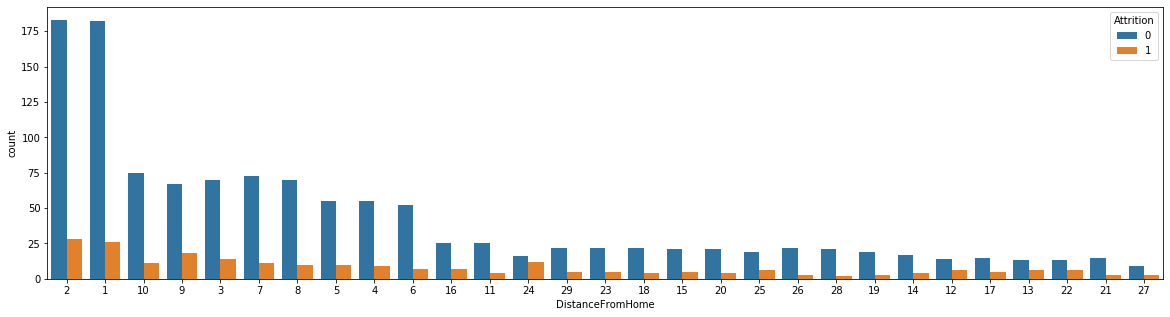

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x="DistanceFromHome", hue="Attrition", data=emp_data, order = emp_data["DistanceFromHome"].value_counts().index)

In [19]:
emp_data.groupby("Attrition").DistanceFromHome.agg(["count","min","max","mean"])

,count,min,max,mean
Attrition,,,,
0,1233,1,29,8.915653
1,237,1,29,10.632911


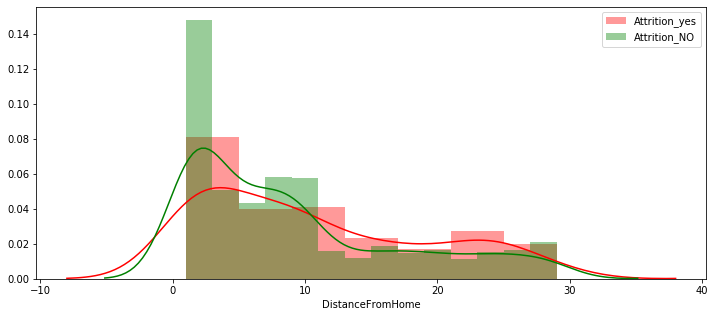

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(attri_yes["DistanceFromHome"],color="red",label= "Attrition_yes")
sns.distplot(attri_no["DistanceFromHome"], color="green", label= "Attrition_NO")
plt.legend()

#### 🤷‍INSIGHT : Distance from Home is not crucial cause for employee to leave the job

## 2.8 Education wise who is leaving more

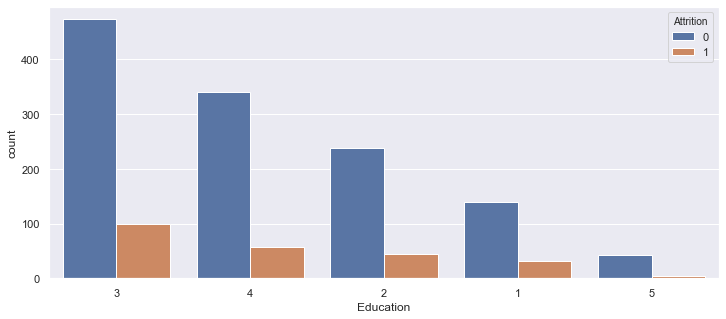

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
sns.countplot(x="Education", hue="Attrition", data=emp_data, order = emp_data["Education"].value_counts().index)

#####                               Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

### 🤷‍INSIGHT : Almost same pattern in all eductaion levels . count wise attrition rate is high in Bachelors and Masters holders

## 2.9 Educational Field and Attrition rate

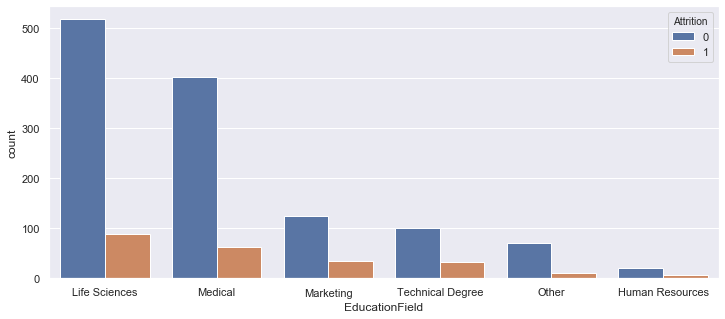

In [22]:
sns.set()
plt.figure(figsize=(12,5))
sns.countplot(x="EducationField", hue="Attrition", data=emp_data, order = emp_data["EducationField"].value_counts().index)

##### 🤷‍ INSIGHT : No specific eduction wise pattern of attrition rate .🤷‍

## 2.10 Environment Satisfaction and Attrition rate

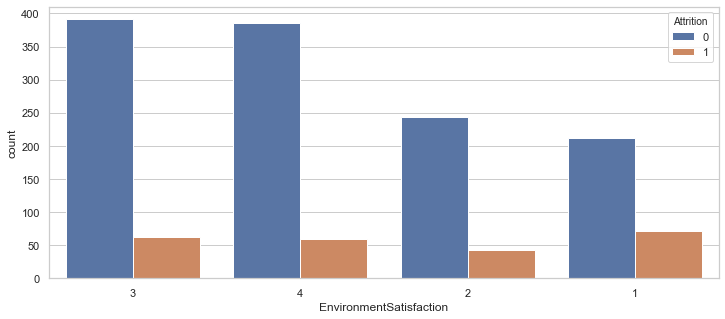

In [23]:
sns.set(style= "whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(x="EnvironmentSatisfaction", hue="Attrition", data=emp_data,order = emp_data["EnvironmentSatisfaction"].value_counts().index)

####   Environment Satisfaction :   1 'Low'    2 'Medium'    3 'High'   4 'Very High'

#### 🤷‍ INSIGHT : Comparatively high attrtition rate in employees having low environment satisfaction 🤷‍

## 2.11 Gender and Attrition

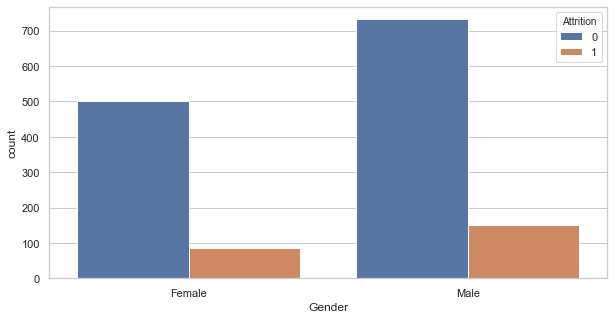

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x="Gender", hue="Attrition", data=emp_data)

### 🤷‍ INSIGHT : Same pattern of Attrition in Males and Females.🤷‍

## 2.12 HourlyRate and Attrition

#### while counting unique values we have seen there are 76 uniques in Hourlrate column and hence we will not visualization , instaed we will use min , max and average value to decide on pattern among attrtion

In [25]:
emp_data.groupby("Attrition").HourlyRate.agg(["count","min","max","mean"])

,count,min,max,mean
Attrition,,,,
0,1233,30,100,65.952149
1,237,31,100,65.573840


#### 🤷‍ INSIGHT : Hourly Rate has no significant impact on Attrition 🤷‍

## 2.13 Job Involvement and Attrition

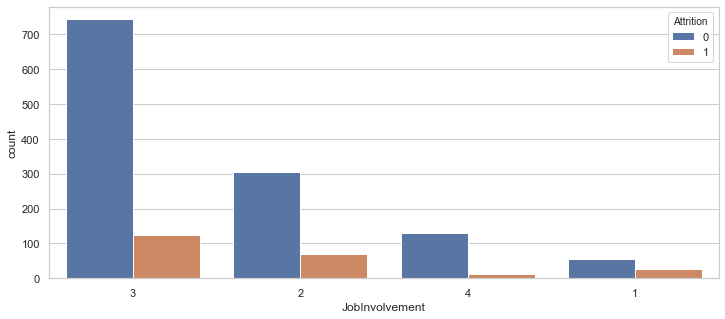

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(x="JobInvolvement", hue="Attrition", data=emp_data, order = emp_data["JobInvolvement"].value_counts().index)

#### JobInvolvement :  1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#### 🤷‍ INSIGHT : People with very high job involvement has lowest Attrition 🤷‍

## 2.14 JobLevel and Attrition

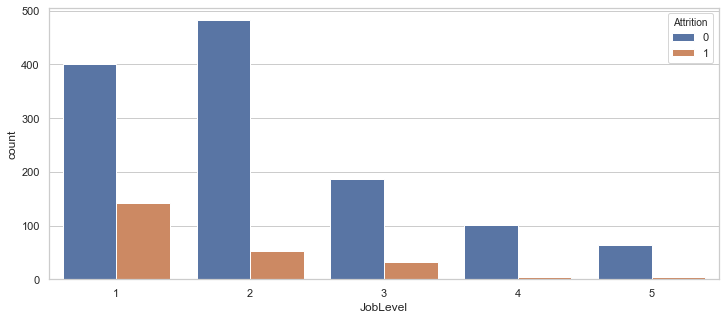

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(x="JobLevel", hue="Attrition", data=emp_data, order = emp_data["JobLevel"].value_counts().index)

#### 🤷‍ INSIGHT : People with job-level 4 & 5  has lowest Attrition 🤷‍

## 2.15 JobRole and Attrition

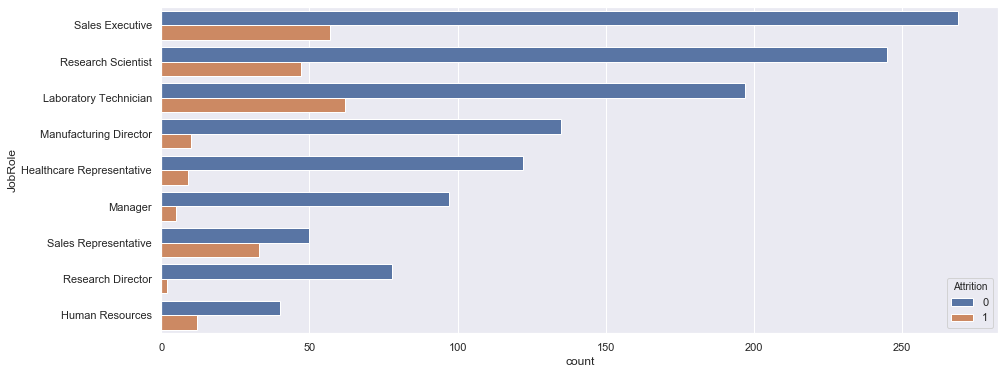

In [28]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
sns.countplot(y="JobRole", hue="Attrition", data=emp_data, order = emp_data["JobRole"].value_counts().index)

#### 🤷‍ INSIGHT : There is lowest attrition in upper management roles like directors and managers 🤷‍

## 2.16 JobSatisfaction and Attrition

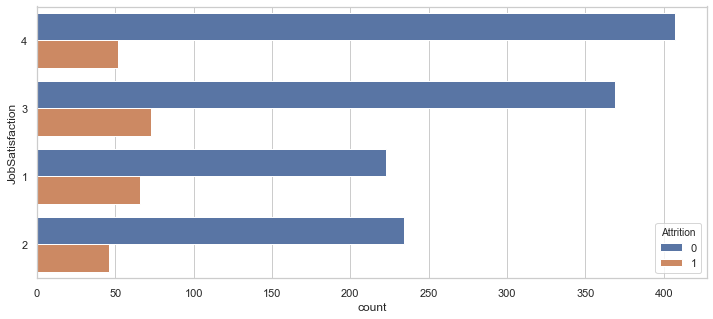

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(y="JobSatisfaction", hue="Attrition", data=emp_data, order = emp_data["JobSatisfaction"].value_counts().index)

#### JobSatisfaction :  1 'Low' 2 'Medium' 3 'High' 4 'Very High'

#### 🤷‍ INSIGHT : Realtively low attrition in employees having job saisfaction high and very high 🤷‍

## 2.17 Marital Status and Attrition

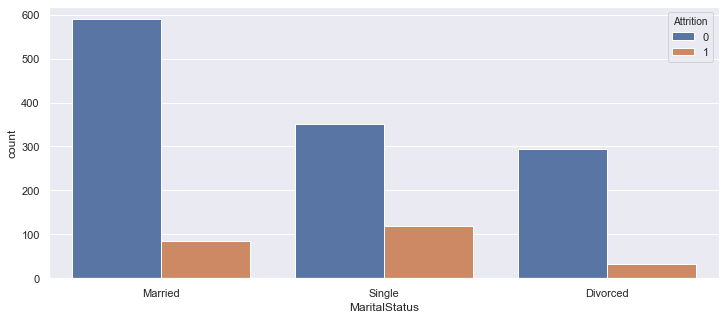

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
sns.countplot(x="MaritalStatus", hue="Attrition", data=emp_data, order = emp_data["MaritalStatus"].value_counts().index)

#### 🤷‍ INSIGHT : Realtively High attrition in single employees 🤷‍

## 2.18 Number of Companies Worked and Attrition rate 

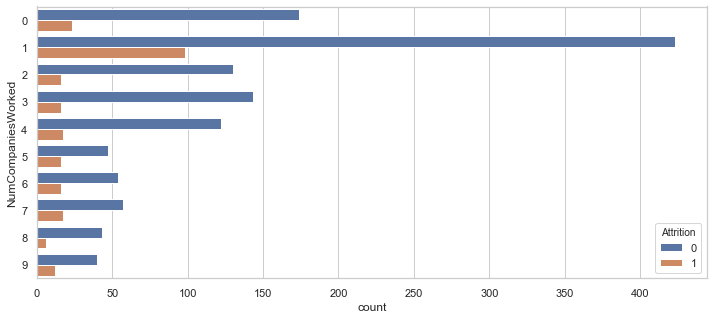

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(y="NumCompaniesWorked", hue="Attrition", data=emp_data)

##### 🤷‍ INSIGHT : People who has worked in either 1 company or more than 5 companies has                                                                                        highest attrition rate near about more than 25 %🤷‍

## 2.18 Overtime and Attrition rate

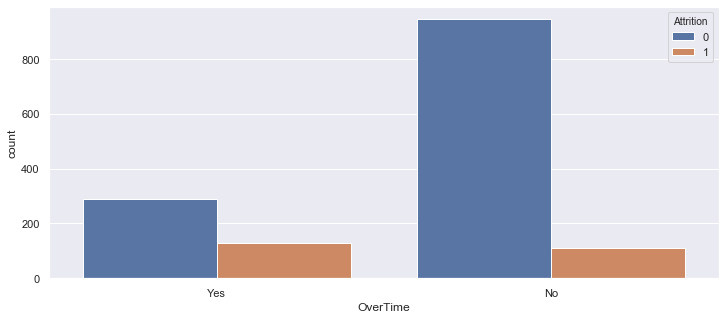

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
sns.countplot(x="OverTime", hue="Attrition", data=emp_data)

#### 🤷‍ INSIGHT : People who need to do Overtime has highest attrition rate 🤷‍

## 2.19 Percent Salary Hike and Attrition rate

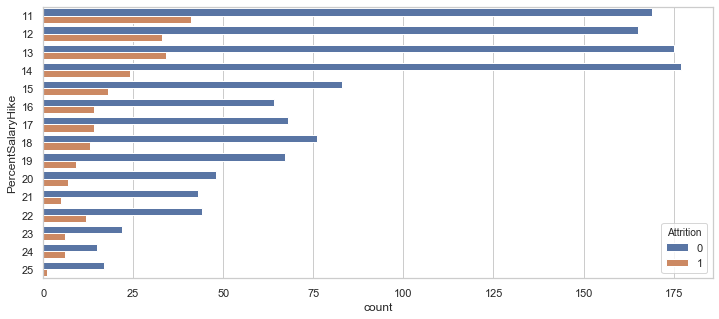

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(y="PercentSalaryHike", hue="Attrition", data=emp_data)

#### 🤷‍ INSIGHT : People who recieved below 19 % salary hike has highest attrition rate 🤷‍

## 2.20 PerformanceRating and Attrition rate

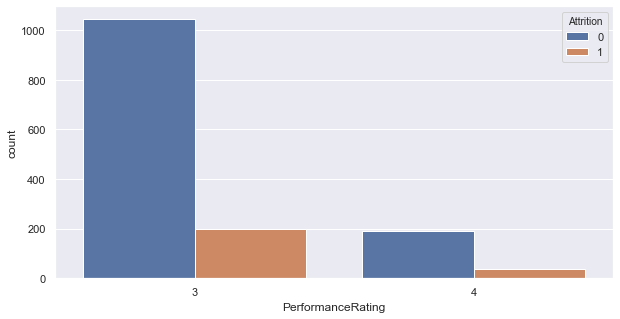

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x="PerformanceRating", hue="Attrition", data=emp_data)

#### 🤷‍ INSIGHT : No significant insights from available data 🤷‍

## 2.21 Relationship Satisfaction and Attrition rate

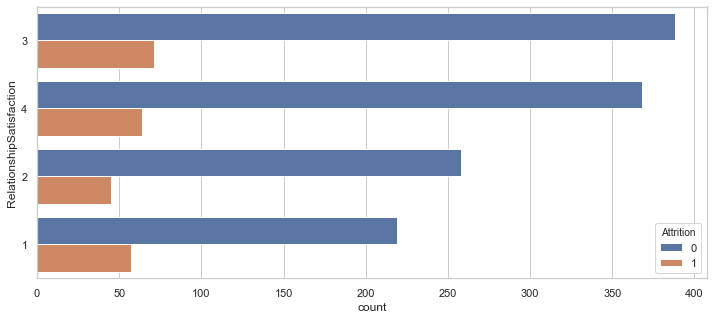

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(y="RelationshipSatisfaction", hue="Attrition", data=emp_data, order = emp_data["RelationshipSatisfaction"].value_counts().index)

####  Relationship Satisfaction :  1 'Low'   2 'Medium'   3 'High'   4 'Very High'

#### 🤷‍ INSIGHT : Relatively high attrtion rate in employees having low  relationship satisfaction 🤷‍

## 2.22 Stock Option Level and Attrition rate

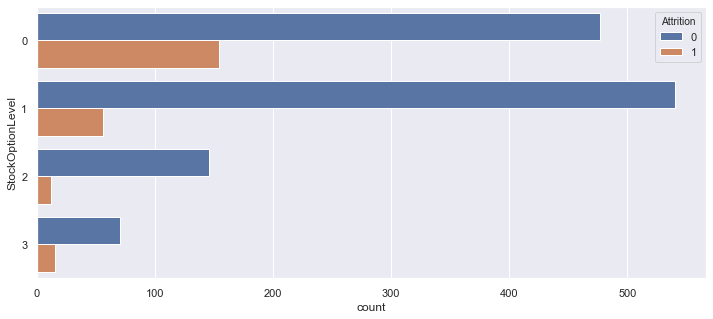

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
sns.countplot(y="StockOptionLevel", hue="Attrition", data=emp_data)

#### 🤷‍ INSIGHT : Relatively high attrtion rate in employees who has stock option level 0 🤷‍

## 2.23 Total Working Years and Attrition rate

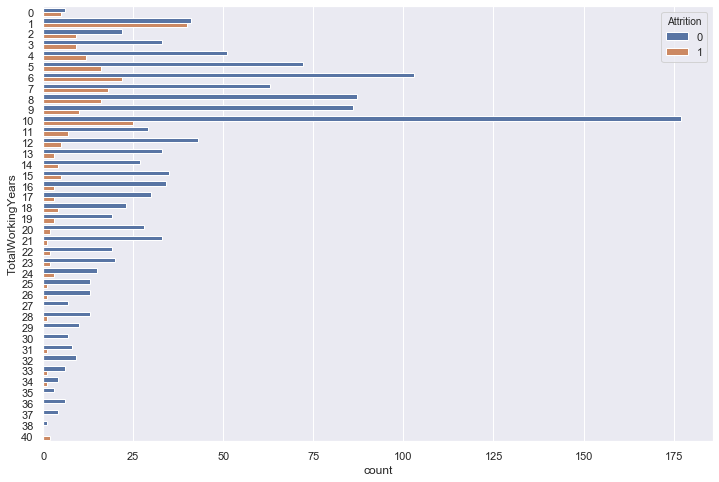

In [37]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(y="TotalWorkingYears", hue="Attrition", data=emp_data)

#### 🤷‍ INSIGHT : Relatively high attrtion rate in people who's working experience is below 13 years  🤷‍

## 2.24 Training Times Last Year and Attrition rate

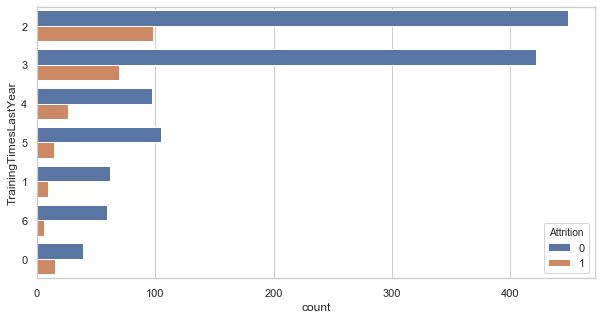

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(y="TrainingTimesLastYear", hue="Attrition", data=emp_data,order = emp_data["TrainingTimesLastYear"].value_counts().index)

#### 🤷‍ INSIGHT : No significant information regarding attrition rate pattern 🤷‍

## 2.25 WorkLife Balance and Attrition rate

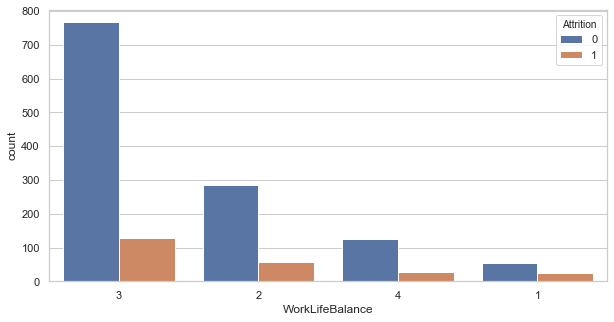

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=emp_data,order = emp_data["WorkLifeBalance"].value_counts().index)

#### WorkLifeBalance :  1 'Bad'    2 'Good'     3 'Better'    4 'Best'

#### 🤷‍ INSIGHT : Reatively high proportion of attrition rate in Work Life Balance category 1 & 2  🤷‍

## 2.26 Years At Company and Attrition rate

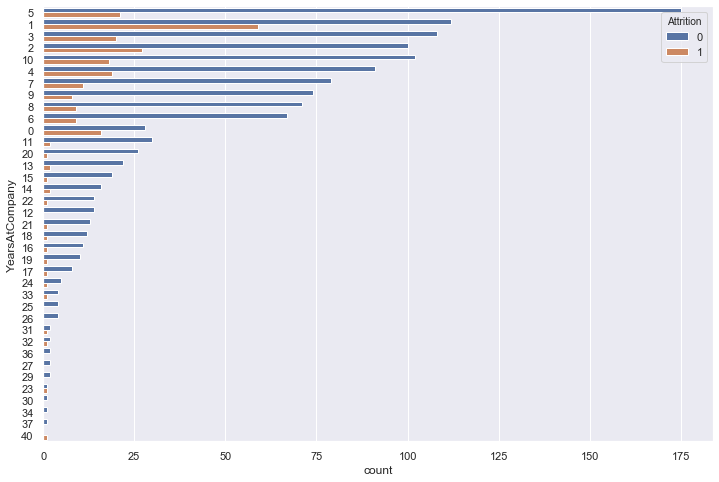

In [40]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(y="YearsAtCompany", hue="Attrition", data=emp_data, order = emp_data["YearsAtCompany"].value_counts().index)

#### 🤷‍ INSIGHT : Reatively high proportion of attrition rate n employees who has spend below than <11 years at company 🤷‍

## 2.27 Years In Current Role and Attrition rate

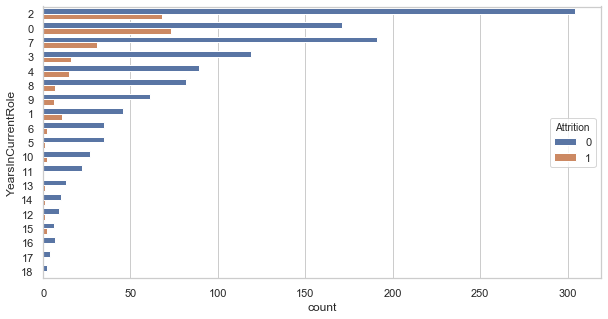

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(y="YearsInCurrentRole", hue="Attrition", data=emp_data, order = emp_data["YearsInCurrentRole"].value_counts().index)

#### 🤷‍ INSIGHT : High attrition rate in employees who has spend below 5 years in current role 🤷‍

## 2.28 Years Since Last Promotion and Attrition rate

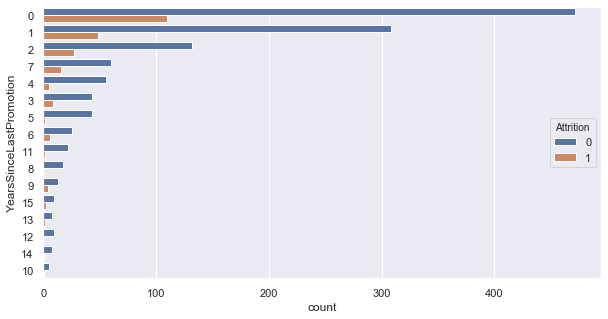

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(y="YearsSinceLastPromotion", hue="Attrition", data=emp_data, order = emp_data["YearsSinceLastPromotion"].value_counts().index)

#### 🤷‍ INSIGHT : 0 years since last promotion indicates either no promotion or recently promoted (less than 1 year), this category has highest attrition rate 🤷‍

## 2.29 Years With Current Manager and Attrition rate

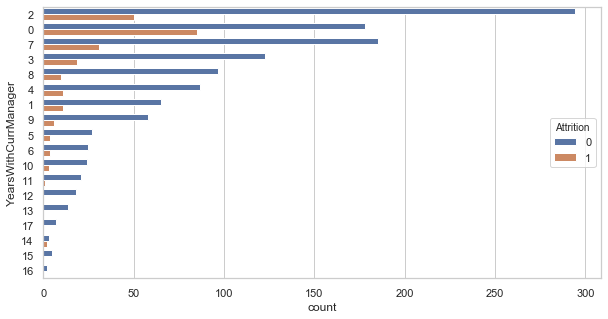

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(y="YearsWithCurrManager", hue="Attrition", data=emp_data,order = emp_data["YearsWithCurrManager"].value_counts().index)

#### 🤷‍ INSIGHT : Employees who has spend less than 1 year with current manager has highest attrition rate 🤷‍

# Step-3 : Summary of Important Insights 

### 3.1 Provided data has class imblance for target variable.

### 3.2 There are three columns in dataset namely EmployeeCount','Over18' ,'StandardHours'                              which contains unique single entry and hene has no impact on decision making.

### 3.3 Features related to High attrition rate

1) Employees below 35 years of age has more attrition rate.

2) Employees having level 1 (low) job satisfaction has high attrition rate

3) Employees with realtionship status single has high attrition rate

4) Employees who does overtime has more attrition rate

5) Employees who received below 19 % salary hike has more attrition rate

6) High attrition rate in employees having low realtionship satisfaction

7) Employees with stock option level 0 has more attrition rate

8) High attrition rate among employees having below 13 years of working experience

9) Employees who has spend less than 1 year with current manager has highest attrition rate

10) 0 years since last promotion indicates either no promotion or recently promoted (less than 1 year), this category has highest attrition rate

11) Relatively high proportion of attrition rate in emplloyees having work life balance category 1 & 2

### 3.4 Features related to Low attrition rate

1.Employees with very high job involvement has lowest attrition rate

2.People with job level 4 & 5 has lowest attrition rate

3.Job roles Manufacturing director, Research director, Healthcare Represenatative and Manager has lowest attrition rate

4.Low attrition rate in employees who have completed more tahn  10 years  in current company

# Step-4 : Initial level Feature Engineering

### 4.1 Identify Feature columns having object type categories

In [44]:
categorical_emp_data=emp_data.select_dtypes(include= ["object"])
categorical_emp_data.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### 4.2 Replace object type categorical data by numeric categories

In [45]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder() # cretaed instance for label encoder

In [47]:
emp_data.BusinessTravel=le.fit_transform(emp_data.BusinessTravel)
emp_data.Department=le.fit_transform(emp_data.Department)
emp_data.EducationField=le.fit_transform(emp_data.EducationField)
emp_data.Gender=le.fit_transform(emp_data.Gender)
emp_data.JobRole=le.fit_transform(emp_data.JobRole)
emp_data.MaritalStatus=le.fit_transform(emp_data.MaritalStatus)
emp_data.Over18=le.fit_transform(emp_data.Over18)
emp_data.OverTime=le.fit_transform(emp_data.OverTime)

To get treated as catgories and not numeric , we need to factorise converted numeric data of above columns

# 5 Feature Selection

### 5.1 In EDA step we have identified 3 columns where single unique values are present and hence we can remove these columns due no impact on decision making

In [48]:
emp_data= emp_data.drop(columns=["EmployeeCount", "Over18","StandardHours"])

### 5.2 Identification of Highly correlated Features

In [49]:
emp_data_corr=emp_data.corr()
emp_data_corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


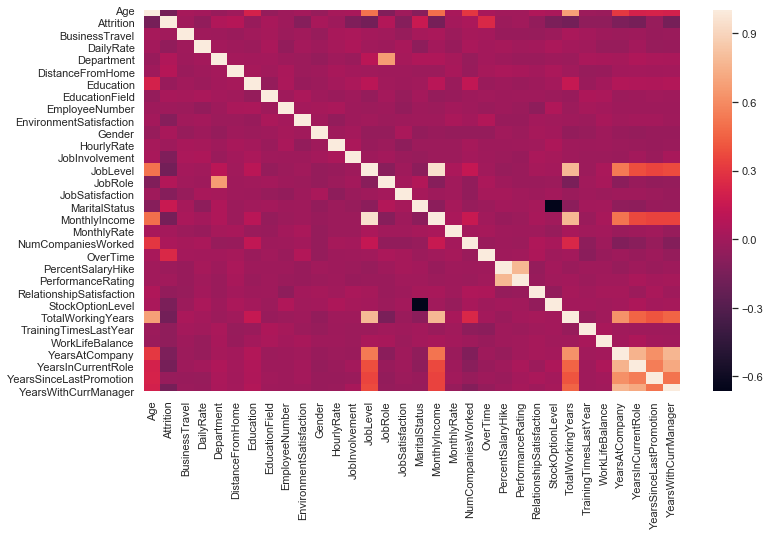

In [50]:
plt.figure(figsize=(12,7))
sns.heatmap(emp_data_corr,xticklabels=emp_data_corr.columns,yticklabels=emp_data_corr.columns)

In [51]:
upper = emp_data_corr.where(np.triu(np.ones(emp_data_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['MonthlyIncome']

In [52]:
emp_data= emp_data.drop(columns=["MonthlyIncome"])

In [53]:
emp_data.shape

(1470, 31)

In [54]:
emp_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


# 6. X & Y Split and sampling (Train and Test)

### 6.1 Creat new dataframe (emp_data_Y) for target variable

In [55]:
emp_data_y=emp_data.Attrition
emp_data_y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [56]:
emp_data_y.isnull().sum()

0

### 6.2 Create second dataframe (emp_data_x) for Independent variables

In [57]:
emp_data_x=emp_data.drop(['Attrition'],axis=1)
emp_data_x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,...,3,4,1,6,3,3,2,2,2,2


### 6.3 Sampling (divide Train & Test)

In [58]:
import sklearn
from sklearn.model_selection import train_test_split

In [59]:
emp_data_x_train,emp_data_x_test, emp_data_y_train,emp_data_y_test = train_test_split(emp_data_x,emp_data_y, test_size = 0.3,random_state=101)

In [60]:
emp_data_x_train.shape

(1029, 30)

In [61]:
emp_data_x_test.shape

(441, 30)

In [62]:
emp_data_y_train.shape

(1029,)

In [63]:
emp_data_y_test.shape

(441,)

# 7. Handling Class Imbalance in Train data

In [64]:
from imblearn.over_sampling import SMOTE
import imblearn
import numpy as np
sm = SMOTE()

Using TensorFlow backend.


In [65]:
print("Before OverSampling, counts of label 'Attrition_Yes': {}".format(sum(emp_data_y_train == 1))) 
print("Before OverSampling, counts of label 'Attrition_No': {} \n".format(sum(emp_data_y_train == 0))) 

emp_data_x_train, emp_data_y_train = sm.fit_sample(emp_data_x_train, emp_data_y_train) 

print('After OverSampling, the shape of emp_data_x_train: {}'.format(emp_data_x_train.shape)) 
print('After OverSampling, the shape of emp_data_y_train: {} \n'.format(emp_data_y_train.shape)) 

print("After OverSampling, counts of label 'Attrition_Yes': {}".format(sum(emp_data_y_train == 1))) 
print("After OverSampling, counts of label 'Attrition_No': {}".format(sum(emp_data_y_train == 0)))

Before OverSampling, counts of label 'Attrition_Yes': 167
Before OverSampling, counts of label 'Attrition_No': 862 

After OverSampling, the shape of emp_data_x_train: (1724, 30)
After OverSampling, the shape of emp_data_y_train: (1724,) 

After OverSampling, counts of label 'Attrition_Yes': 862
After OverSampling, counts of label 'Attrition_No': 862


# 8. Model Building

### Necessary imports

In [66]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

### Creating instances for classifiers

In [67]:
logmodel1= LogisticRegression()
dtree1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
naive_bay1= MultinomialNB()
svc_model1= SVC()
abc1 = AdaBoostClassifier (DecisionTreeClassifier(), n_estimators = 15)

### Train the models

In [68]:
logmodel1.fit(emp_data_x_train, emp_data_y_train)
dtree1.fit(emp_data_x_train, emp_data_y_train)
rfc1.fit(emp_data_x_train, emp_data_y_train)
naive_bay1.fit(emp_data_x_train, emp_data_y_train)
svc_model1.fit(emp_data_x_train, emp_data_y_train)
abc1.fit(emp_data_x_train, emp_data_y_train)

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

### Predict on Test data

In [69]:
pred1 = logmodel1.predict(emp_data_x_test)
pred1_dt = dtree1.predict(emp_data_x_test)
pred1_rfc = rfc1.predict(emp_data_x_test)
pred1_nb =naive_bay1.predict(emp_data_x_test)
pred1_svc = svc_model1.predict(emp_data_x_test)
pred1_abc = abc1.predict(emp_data_x_test)

### Compare Confusion Matrices of all the above models

In [70]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [71]:
cf_logi = confusion_matrix(emp_data_y_test,pred1)
cf_dt= confusion_matrix(emp_data_y_test,pred1_dt)
cf_rfc = confusion_matrix(emp_data_y_test,pred1_rfc)
cf_nb= confusion_matrix(emp_data_y_test,pred1_nb)
cf_svc= confusion_matrix(emp_data_y_test,pred1_svc)
cf_abc = confusion_matrix(emp_data_y_test,pred1_abc)

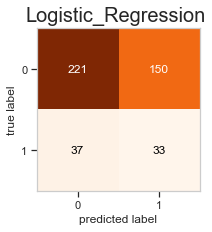

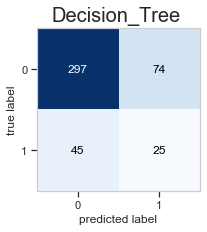

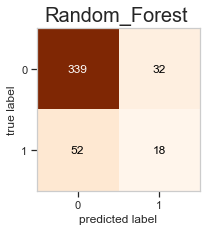

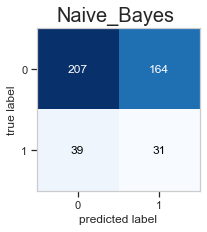

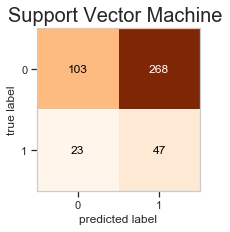

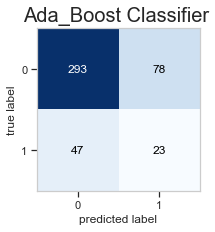

In [72]:
binary1 = np.array(cf_logi)
binary2 = np.array(cf_dt)
binary3 = np.array(cf_rfc)
binary4 = np.array(cf_nb)
binary5 = np.array(cf_svc)
binary6 = np.array(cf_abc)

fig, ax = plot_confusion_matrix(conf_mat=binary1,figsize=(3, 3),cmap='Oranges')
plt.suptitle('Logistic_Regression' ,fontsize= 20)
fig, ax1 = plot_confusion_matrix(conf_mat=binary2,figsize=(3, 3))
plt.suptitle('Decision_Tree' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary3,figsize=(3, 3),cmap='Oranges')
plt.suptitle('Random_Forest' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary4,figsize=(3, 3))
plt.suptitle('Naive_Bayes' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary5,figsize=(3, 3),cmap='Oranges')
plt.suptitle('Support Vector Machine' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary6,figsize=(3, 3))
plt.suptitle('Ada_Boost Classifier' ,fontsize= 20)
plt.show()

# 9 Evaluate all models

### 9.1 Accuracy scores

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
Acc1_logmodel1 = accuracy_score(emp_data_y_test, pred1)
Acc1_dt1 = accuracy_score(emp_data_y_test, pred1_dt)
Acc1_rfc1 = accuracy_score(emp_data_y_test, pred1_rfc)
Acc1_nb1 = accuracy_score(emp_data_y_test, pred1_nb)
Acc1_svc1 = accuracy_score(emp_data_y_test, pred1_svc)
Acc1_boost1 = accuracy_score(emp_data_y_test, pred1_abc)
AccuracyScores1 = [Acc1_logmodel1,Acc1_dt1,Acc1_rfc1,Acc1_nb1,Acc1_svc1,Acc1_boost1]
print (AccuracyScores1)

[0.5759637188208617, 0.7301587301587301, 0.8095238095238095, 0.5396825396825397, 0.3401360544217687, 0.7165532879818595]


### 9.2 Precision Scores

In [75]:
from sklearn.metrics import precision_score

In [76]:
Prec1_logmodel1 = precision_score(emp_data_y_test, pred1)
Prec1_dt1 = precision_score(emp_data_y_test, pred1_dt)
Prec1_rfc1 = precision_score(emp_data_y_test, pred1_rfc)
Prec1_nb1 = precision_score(emp_data_y_test, pred1_nb)
Prec1_svc1 = precision_score(emp_data_y_test, pred1_svc)
Prec1_boost1 = precision_score(emp_data_y_test, pred1_abc)
PrecisionScores1 = [Prec1_logmodel1,Prec1_dt1,Prec1_rfc1,Prec1_nb1,Prec1_svc1,Prec1_boost1]
print (PrecisionScores1)

[0.18032786885245902, 0.25252525252525254, 0.36, 0.15897435897435896, 0.1492063492063492, 0.22772277227722773]


### 9.3 Recall / Sensitivity

In [77]:
from sklearn.metrics import recall_score

In [78]:
Rec1_logmodel1 = recall_score(emp_data_y_test, pred1)
Rec1_dt1 = recall_score(emp_data_y_test, pred1_dt)
Rec1_rfc1 = recall_score(emp_data_y_test, pred1_rfc)
Rec1_nb1 = recall_score(emp_data_y_test, pred1_nb)
Rec1_svc1 = recall_score(emp_data_y_test, pred1_svc)
Rec1_boost1 = recall_score(emp_data_y_test, pred1_abc)
Recall_Sensitivity1 = [Rec1_logmodel1,Rec1_dt1,Rec1_rfc1,Rec1_nb1,Rec1_svc1,Rec1_boost1]
print (Recall_Sensitivity1)

[0.4714285714285714, 0.35714285714285715, 0.2571428571428571, 0.44285714285714284, 0.6714285714285714, 0.32857142857142857]


### 9.3 Specificity (Recall of Negative class or class "0")

In [79]:
spec1_logmodel1 = recall_score(emp_data_y_test, pred1,pos_label=0)
spec1_dt1 = recall_score(emp_data_y_test, pred1_dt,pos_label=0)
spec1_rfc1 = recall_score(emp_data_y_test, pred1_rfc,pos_label=0)
spec1_nb1 = recall_score(emp_data_y_test, pred1_nb,pos_label=0)
spec1_svc1 = recall_score(emp_data_y_test, pred1_svc,pos_label=0)
spec1_boost1 = recall_score(emp_data_y_test, pred1_abc,pos_label=0)
specificity1 = [spec1_logmodel1,spec1_dt1,spec1_rfc1,spec1_nb1,spec1_svc1,spec1_boost1]
print (specificity1)

[0.5956873315363881, 0.8005390835579514, 0.9137466307277629, 0.5579514824797843, 0.2776280323450135, 0.7897574123989218]


### 9.4 Kappa Value

In [80]:
from sklearn.metrics import cohen_kappa_score

In [81]:
kappa1_logmodel1 = cohen_kappa_score(emp_data_y_test, pred1)
kappa1_dt1 = cohen_kappa_score(emp_data_y_test, pred1_dt)
kappa1_rfc1 = cohen_kappa_score(emp_data_y_test, pred1_rfc)
kappa1_nb1 = cohen_kappa_score(emp_data_y_test, pred1_nb)
kappa1_svc1 = cohen_kappa_score(emp_data_y_test, pred1_svc)
kappa1_boost1 = cohen_kappa_score(emp_data_y_test, pred1_abc)
Kappa_Value1= [kappa1_logmodel1,kappa1_dt1,kappa1_rfc1,kappa1_nb1,kappa1_svc1,kappa1_boost1]
print (Kappa_Value1)

[0.04055704861959453, 0.13499480789200424, 0.19329268292682922, 0.0004689331770221239, -0.021052631578947434, 0.10030846566891338]


### 9.5 Compare Models

In [82]:
Names = ["LogisticReg1","DecisionTree1","RandomForest1","NaiveByes1","SVM1","Boosting1"]

In [83]:
df = pd.DataFrame(list(zip(Names, AccuracyScores1,PrecisionScores1,Recall_Sensitivity1,specificity1, Kappa_Value1)), 
               columns =['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity",'specificity', "Kappa_Value"]) 
df2 =df.sort_values(by=['Accuracy'], ascending=False)
cm = sns.light_palette("green", as_cmap=True)
Model_comparison_1 = df2.style.background_gradient(cmap=cm)
Model_comparison_1

,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
2,RandomForest1,0.809524,0.36,0.257143,0.913747,0.193293
1,DecisionTree1,0.730159,0.252525,0.357143,0.800539,0.134995
5,Boosting1,0.716553,0.227723,0.328571,0.789757,0.100308
0,LogisticReg1,0.575964,0.180328,0.471429,0.595687,0.040557
3,NaiveByes1,0.539683,0.158974,0.442857,0.557951,0.000468933
4,SVM1,0.340136,0.149206,0.671429,0.277628,-0.0210526


## 10. Feature Selection (Level-2 )

In [84]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFE

### 10.1 Select-K-Best

In [85]:
test= SelectKBest(score_func=chi2,k=10)

fitted_cr = test.fit(emp_data_x, emp_data_y)

In [86]:
fitted_scr = test.fit(emp_data_x, emp_data_y)
df3 = pd.DataFrame({"Feauture": emp_data_x.columns, "Select-K-Best Score": fitted_scr.scores_})
df3

,Feauture,Select-K-Best Score
0,Age,84.155277
1,BusinessTravel,0.000002
2,DailyRate,956.580494
3,Department,1.329297
4,DistanceFromHome,63.772142
5,Education,0.520642
6,EducationField,0.834912
7,EmployeeNumber,58.120326
8,EnvironmentSatisfaction,6.890594
9,Gender,0.510087


### 10.2 Boruta

In [87]:
emp_data_x1 = np.array(emp_data_x)
emp_data_y1 = np.array(emp_data_y)
rf = RandomForestClassifier()
boruta_feature_selector = BorutaPy(rf, random_state = 111, max_iter = 25, perc = 100, verbose = 2)
boruta_feature_selector.fit(emp_data_x1, emp_data_y1)
df4 = pd.DataFrame({"Column name": emp_data_x.columns, "Feature": boruta_feature_selector.support_})
df4

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	3
Tentative: 	2
Rejected: 	25
Iteration: 	9 / 25
Confirmed: 	3
Tentative: 	2
Rejected: 	25
Iteration: 	10 / 25
Confirmed: 	3
Tentative: 	2
Rejected: 	25
Iteration: 	11 / 25
Confirmed: 	3
Tentative: 	2
Rejected: 	25
Iteration: 	12 / 25
Confirmed: 	3
Tentative: 	1
Rejected: 	26
Iteration: 	13 / 25
Confirmed: 	3
Tentative: 	1
Rejected: 	26
Iteration: 	14 / 25
Confirmed: 	3
Tentative: 	1
Rejected: 	26
Iteration: 	15 / 25
Confirmed: 	3
Tentative: 	1
Rejected: 	26
Iteration: 	16 / 25
Confirmed: 	3
Tentative: 	1
Rejected: 	26
Iteration: 	17 / 

,Column name,Feature
0,Age,True
1,BusinessTravel,False
2,DailyRate,False
3,Department,False
4,DistanceFromHome,False
5,Education,False
6,EducationField,False
7,EmployeeNumber,False
8,EnvironmentSatisfaction,False
9,Gender,False


### 10.3 Recursive Feature Selection (RFE)

In [88]:
rfc = RandomForestClassifier()
rfe_rfc = RFE(rfc, 10) #...top 5 important feature
rfe_rfc.fit(emp_data_x, emp_data_y)
df5 = pd.DataFrame({"Column name": emp_data_x.columns, "Feature": rfe_rfc.support_})
df5

,Column name,Feature
0,Age,True
1,BusinessTravel,False
2,DailyRate,True
3,Department,False
4,DistanceFromHome,True
5,Education,False
6,EducationField,False
7,EmployeeNumber,True
8,EnvironmentSatisfaction,False
9,Gender,False


### 10.4 Feature Importance by Decision Tree

In [89]:
dtree_fi = DecisionTreeClassifier()
dtree_fi.fit(emp_data_x, emp_data_y)
df6 = pd.DataFrame({"Feauture": emp_data_x.columns, "Importance": dtree_fi.feature_importances_})
df6

,Feauture,Importance
0,Age,0.067059
1,BusinessTravel,0.000000
2,DailyRate,0.062954
3,Department,0.006361
4,DistanceFromHome,0.028519
5,Education,0.008552
6,EducationField,0.007481
7,EmployeeNumber,0.072750
8,EnvironmentSatisfaction,0.034113
9,Gender,0.000000


### 10.5 Feature Importance by Random Forest

In [90]:
rfc_fi = RandomForestClassifier()
rfc_fi.fit(emp_data_x, emp_data_y)
df7 = pd.DataFrame({"Feauture": emp_data_x.columns, "Importance": rfc_fi.feature_importances_})
df7

,Feauture,Importance
0,Age,0.067711
1,BusinessTravel,0.014235
2,DailyRate,0.056417
3,Department,0.014107
4,DistanceFromHome,0.052052
5,Education,0.018991
6,EducationField,0.024914
7,EmployeeNumber,0.052481
8,EnvironmentSatisfaction,0.031350
9,Gender,0.010228


### 10.6 Selection of Features

In [91]:
Feature_selection = pd.DataFrame({"Feauture": emp_data_x.columns, "Select-K-Best Score": fitted_scr.scores_,
                                  "Importance(Decision Tree)": dtree1.feature_importances_, "Importance (RandomForest)": rfc1.feature_importances_,
                                 "Boruta-Support": boruta_feature_selector.support_,"RFE-Support": rfe_rfc.support_ })
Feature_selection=Feature_selection.sort_values(by=['Select-K-Best Score'], ascending=False)
cm = sns.light_palette("orange", as_cmap=True)
Feature_selection1 =  Feature_selection.style.background_gradient(cmap=cm)
Feature_selection1

,Feauture,Select-K-Best Score,Importance(Decision Tree),Importance (RandomForest),Boruta-Support,RFE-Support
16,MonthlyRate,1196.63,0.0617991,0.0513741,False,True
2,DailyRate,956.58,0.03792,0.0423679,False,True
23,TotalWorkingYears,230.722,0.0459276,0.0541665,True,True
26,YearsAtCompany,142.1,0,0.0318171,False,True
27,YearsInCurrentRole,117.523,0.00801807,0.0351901,False,False
29,YearsWithCurrManager,110.672,0.0324886,0.0362968,False,False
0,Age,84.1553,0.0213159,0.0451876,True,True
18,OverTime,63.8451,0.0193791,0.0114943,True,True
4,DistanceFromHome,63.7721,0.0611266,0.0377966,False,True
7,EmployeeNumber,58.1203,0.0316214,0.0416834,False,True


From Feature Selection analyis we decided below faetures as important parameters

DailyRate,	TotalWorkingYears	,YearsAtCompany,	YearsInCurrentRole,	
YearsWithCurrManager,	Age,	OverTime,	DistanceFromHome,	EmployeeNumber	,
StockOptionLevel,	JobLevel,	MaritalStatus,	JobRole	,
YearsSinceLastPromotion,	JobSatisfaction,	EnvironmentSatisfaction,	NumCompaniesWorked,	
JobInvolvement,	HourlyRate,	PercentSalaryHike

# 11 Re-build the models

In [92]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

### Create instances for classifiers

In [93]:
logmodel2= LogisticRegression()
dtree2 = DecisionTreeClassifier()
rfc2 = RandomForestClassifier()
naive_bay2= MultinomialNB()
svc_model2= SVC()
abc2 = AdaBoostClassifier (DecisionTreeClassifier(), n_estimators = 15)

### Train & Test data based on selected features

In [94]:
new_empdata_x_train= emp_data_x_train.loc[:,['DailyRate', 'TotalWorkingYears' ,'YearsAtCompany', 'YearsInCurrentRole',
                                             'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'EmployeeNumber' , 
                                             'StockOptionLevel', 'JobLevel', 'MaritalStatus', 'JobRole' , 'YearsSinceLastPromotion', 
                                             'JobSatisfaction', 'EnvironmentSatisfaction', 'NumCompaniesWorked','JobInvolvement', 
                                             'HourlyRate', 'PercentSalaryHike']]

new_empdata_x_test= emp_data_x_test.loc[:,['DailyRate', 'TotalWorkingYears' ,'YearsAtCompany', 'YearsInCurrentRole',
                                             'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'EmployeeNumber' , 
                                             'StockOptionLevel', 'JobLevel', 'MaritalStatus', 'JobRole' , 'YearsSinceLastPromotion', 
                                             'JobSatisfaction', 'EnvironmentSatisfaction', 'NumCompaniesWorked','JobInvolvement', 
                                             'HourlyRate', 'PercentSalaryHike']]

In [95]:
new_empdata_x_train.shape

(1724, 20)

In [96]:
new_empdata_x_test.shape

(441, 20)

### Train the models

In [97]:
logmodel2.fit(new_empdata_x_train, emp_data_y_train)
dtree2.fit(new_empdata_x_train, emp_data_y_train)
rfc2.fit(new_empdata_x_train, emp_data_y_train)
naive_bay2.fit(new_empdata_x_train, emp_data_y_train)
svc_model2.fit(new_empdata_x_train, emp_data_y_train)
abc2.fit(new_empdata_x_train, emp_data_y_train)

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

## Predict on Test data

In [98]:
pred2 = logmodel2.predict(new_empdata_x_test)
pred2_dt = dtree2.predict(new_empdata_x_test)
pred2_rfc = rfc2.predict(new_empdata_x_test)
pred2_nb =naive_bay2.predict(new_empdata_x_test)
pred2_svc = svc_model2.predict(new_empdata_x_test)
pred2_abc = abc2.predict(new_empdata_x_test)

### Compare Confusion Matrices of all the above models

In [99]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [100]:
cm_logi = confusion_matrix(emp_data_y_test,pred2)
cm_dt= confusion_matrix(emp_data_y_test,pred2_dt)
cm_rfc = confusion_matrix(emp_data_y_test,pred2_rfc)
cm_nb= confusion_matrix(emp_data_y_test,pred2_nb)
cm_svc= confusion_matrix(emp_data_y_test,pred2_svc)
cm_abc = confusion_matrix(emp_data_y_test,pred2_abc)

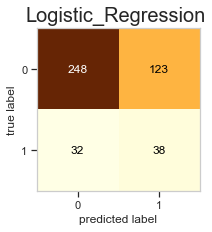

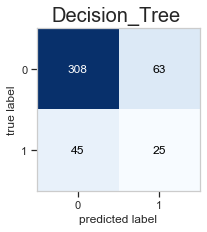

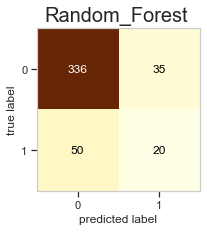

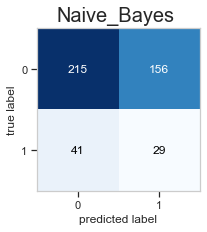

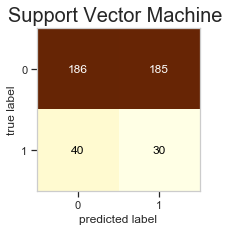

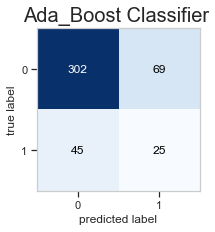

In [101]:

binary7 = np.array(cm_logi)
binary8 = np.array(cm_dt)
binary9 = np.array(cm_rfc)
binary10 = np.array(cm_nb)
binary11 = np.array(cm_svc)
binary12 = np.array(cm_abc)

fig, ax = plot_confusion_matrix(conf_mat=binary7,figsize=(3, 3),cmap='YlOrBr')
plt.suptitle('Logistic_Regression' ,fontsize= 20)
fig, ax1 = plot_confusion_matrix(conf_mat=binary8,figsize=(3, 3))
plt.suptitle('Decision_Tree' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary9,figsize=(3, 3),cmap='YlOrBr')
plt.suptitle('Random_Forest' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary10,figsize=(3, 3))
plt.suptitle('Naive_Bayes' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary11,figsize=(3, 3),cmap='YlOrBr')
plt.suptitle('Support Vector Machine' ,fontsize= 20)
fig, ax = plot_confusion_matrix(conf_mat=binary12,figsize=(3, 3))
plt.suptitle('Ada_Boost Classifier' ,fontsize= 20)
plt.show()

### Generate Accuracy Scores for all new models

In [102]:
from sklearn.metrics import accuracy_score

Acc2_logmodel2 = accuracy_score(emp_data_y_test, pred2)
Acc2_dt2 = accuracy_score(emp_data_y_test, pred2_dt)
Acc2_rfc2 = accuracy_score(emp_data_y_test, pred2_rfc)
Acc2_nb2 = accuracy_score(emp_data_y_test, pred2_nb)
Acc2_svc2 = accuracy_score(emp_data_y_test, pred2_svc)
Acc2_boost2 = accuracy_score(emp_data_y_test, pred2_abc)
AccuracyScores2 = [Acc2_logmodel2,Acc2_dt2,Acc2_rfc2,Acc2_nb2,Acc2_svc2,Acc2_boost2]
print (AccuracyScores2)

[0.6485260770975056, 0.7551020408163265, 0.8072562358276644, 0.5532879818594104, 0.4897959183673469, 0.7414965986394558]


### Generate Precision Scores for all new models

In [103]:
from sklearn.metrics import precision_score

Prec2_logmodel2 = precision_score(emp_data_y_test, pred2)
Prec2_dt2 = precision_score(emp_data_y_test, pred2_dt)
Prec2_rfc2 = precision_score(emp_data_y_test, pred2_rfc)
Prec2_nb2 = precision_score(emp_data_y_test, pred2_nb)
Prec2_svc2 = precision_score(emp_data_y_test, pred2_svc)
Prec2_boost2 = precision_score(emp_data_y_test, pred2_abc)
PrecisionScores2 = [Prec2_logmodel2,Prec2_dt2,Prec2_rfc2,Prec2_nb2,Prec2_svc2,Prec2_boost2]
print (PrecisionScores2)

[0.2360248447204969, 0.2840909090909091, 0.36363636363636365, 0.15675675675675677, 0.13953488372093023, 0.26595744680851063]


### Generate Recall/Sensitivity Scores for all new models

In [104]:
from sklearn.metrics import recall_score

Rec2_logmodel2 = recall_score(emp_data_y_test, pred2)
Rec2_dt2 = recall_score(emp_data_y_test, pred2_dt)
Rec2_rfc2 = recall_score(emp_data_y_test, pred2_rfc)
Rec2_nb2 = recall_score(emp_data_y_test, pred2_nb)
Rec2_svc2 = recall_score(emp_data_y_test, pred2_svc)
Rec2_boost2 = recall_score(emp_data_y_test, pred2_abc)
Recall_Sensitivity2 = [Rec2_logmodel2,Rec2_dt2,Rec2_rfc2,Rec2_nb2,Rec2_svc2,Rec2_boost2]
print (Recall_Sensitivity2)

[0.5428571428571428, 0.35714285714285715, 0.2857142857142857, 0.4142857142857143, 0.42857142857142855, 0.35714285714285715]


### Generate Specificity Scores for all new models

In [105]:
spec2_logmodel2 = recall_score(emp_data_y_test, pred2,pos_label=0)
spec2_dt2 = recall_score(emp_data_y_test, pred2_dt,pos_label=0)
spec2_rfc2 = recall_score(emp_data_y_test, pred2_rfc,pos_label=0)
spec2_nb2 = recall_score(emp_data_y_test, pred2_nb,pos_label=0)
spec2_svc2 = recall_score(emp_data_y_test, pred2_svc,pos_label=0)
spec2_boost2 = recall_score(emp_data_y_test, pred2_abc,pos_label=0)
specificity2 = [spec2_logmodel2,spec2_dt2,spec2_rfc2,spec2_nb2,spec2_svc2,spec2_boost2]
print (specificity2)


[0.6684636118598383, 0.8301886792452831, 0.9056603773584906, 0.5795148247978437, 0.5013477088948787, 0.8140161725067385]


### Generate Kappa Value Scores for all new models

In [106]:
from sklearn.metrics import cohen_kappa_score

kappa2_logmodel2 = cohen_kappa_score(emp_data_y_test, pred2)
kappa2_dt2 = cohen_kappa_score(emp_data_y_test, pred2_dt)
kappa2_rfc2 = cohen_kappa_score(emp_data_y_test, pred2_rfc)
kappa2_nb2 = cohen_kappa_score(emp_data_y_test, pred2_nb)
kappa2_svc2 = cohen_kappa_score(emp_data_y_test, pred2_svc)
kappa2_boost2 = cohen_kappa_score(emp_data_y_test, pred2_abc)
Kappa_Value2= [kappa2_logmodel2,kappa2_dt2,kappa2_rfc2,kappa2_nb2,kappa2_svc2,kappa2_boost2]
print (Kappa_Value2)

[0.1383570105003089, 0.16963631925799372, 0.20959409594095946, -0.0037201779215527697, -0.038081288905162936, 0.15026029342167524]


### Compare Models

In [107]:
Names = ["LogisticReg2","DecisionTree2","RandomForest2","NaiveByes2","SVM2","Boosting2"]

df = pd.DataFrame(list(zip(Names, AccuracyScores2,PrecisionScores2,Recall_Sensitivity2,specificity2, Kappa_Value2)), 
               columns =['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity",'specificity', "Kappa_Value"]) 
df2 =df.sort_values(by=['Accuracy'], ascending=False)
cm = sns.light_palette("purple", as_cmap=True)
Model_comparison_2 = df2.style.background_gradient(cmap=cm)
Model_comparison_2

,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
2,RandomForest2,0.807256,0.363636,0.285714,0.90566,0.209594
1,DecisionTree2,0.755102,0.284091,0.357143,0.830189,0.169636
5,Boosting2,0.741497,0.265957,0.357143,0.814016,0.15026
0,LogisticReg2,0.648526,0.236025,0.542857,0.668464,0.138357
3,NaiveByes2,0.553288,0.156757,0.414286,0.579515,-0.00372018
4,SVM2,0.489796,0.139535,0.428571,0.501348,-0.0380813


#### Based on above evaluation Random Forest model with 20 selected features is appropriate for this Prediction 

## 🙏🙏🙏🙏🙏🙏🙏🙏Thank You🙏🙏🙏🙏🙏🙏🙏🙏

In [108]:
Attr_data = pd.read_csv(r"C:\Users\Manish\Desktop\Imarticus Project\R project\R Project - Attrition\Attrition.csv")

In [109]:
#Lets utilize Insights geerated fro Feature engineering

In [110]:
pd.set_option('display.max_columns',None)
Attr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [111]:
#..We are assigning 1 for Features Related To High attrition rate otherwise 0
Attr_data['Age_New'] = np.where((Attr_data.Age <= 35),1,0)
Attr_data['JobSatisfaction_New'] = np.where((Attr_data.JobSatisfaction == 1),1,0)
Attr_data['MaritalStatus_New'] = np.where((Attr_data.MaritalStatus == 'Single'),1,0)
Attr_data['PercentSalaryHike_New'] = np.where((Attr_data.PercentSalaryHike <= 19),1,0)
Attr_data['StockOptionLevel_New'] = np.where((Attr_data.StockOptionLevel == 0),1,0)
Attr_data['TotalWorkingYears_New'] = np.where((Attr_data.TotalWorkingYears <= 13),1,0)
Attr_data['YearsWithCurrManager_New'] = np.where((Attr_data.YearsWithCurrManager <= 1),1,0)
Attr_data['YearsSinceLastPromotion_New'] = np.where((Attr_data.YearsSinceLastPromotion == 0),1,0)
Attr_data['WorkLifeBalance_New'] = np.where((Attr_data.WorkLifeBalance <= 2),1,0)

#We are assigning 0 for Features related to  Low Attrition rate otherwise 1
Attr_data['JobInvolvement_New'] = np.where((Attr_data.JobInvolvement == 4),0,1)
Attr_data['JobLevel_New'] = np.where((Attr_data.JobLevel >= 4),0,1)
Attr_data['YearsAtCompany_New'] = np.where((Attr_data.YearsAtCompany >= 10),0,1)

In [112]:
#Delete original columns
Attr_data= Attr_data.drop(columns=["Age", "JobSatisfaction","MaritalStatus","PercentSalaryHike",
                                   "StockOptionLevel","TotalWorkingYears","YearsWithCurrManager",
                                  "YearsSinceLastPromotion","WorkLifeBalance","JobInvolvement","JobLevel",
                                  "YearsAtCompany"])

In [113]:
#delete column having single unique 
Attr_data= Attr_data.drop(columns=["EmployeeCount", "Over18","StandardHours"])

In [114]:
categorical_Attr_data=Attr_data.select_dtypes(include= ["object"])
categorical_Attr_data.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'OverTime'],
      dtype='object')

In [115]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [116]:
le = LabelEncoder() # cretaed instance for label encoder

In [117]:
Attr_data.Attrition=le.fit_transform(Attr_data.Attrition)
Attr_data.BusinessTravel=le.fit_transform(Attr_data.BusinessTravel)
Attr_data.Department=le.fit_transform(Attr_data.Department)
Attr_data.EducationField=le.fit_transform(Attr_data.EducationField)
Attr_data.Gender=le.fit_transform(Attr_data.Gender)
Attr_data.JobRole=le.fit_transform(Attr_data.JobRole)
Attr_data.OverTime=le.fit_transform(Attr_data.OverTime)

In [118]:
#Delete highly correalted column
Attr_data= Attr_data.drop(columns=["MonthlyIncome"])

In [119]:
Attr_data_y=Attr_data.Attrition
Attr_data_x=Attr_data.drop(['Attrition'],axis=1)

In [120]:
#Sampling 
import sklearn
from sklearn.model_selection import train_test_split

In [121]:
Attr_data_x_train,Attr_data_x_test, Attr_data_y_train,Attr_data_y_test = train_test_split(Attr_data_x,Attr_data_y, test_size = 0.3,random_state=101)


In [122]:
# Class Imbalnace

from imblearn.over_sampling import SMOTE
import imblearn
import numpy as np
sm = SMOTE()

In [123]:
print("Before OverSampling, counts of label 'Attrition_Yes': {}".format(sum(Attr_data_y_train == 1))) 
print("Before OverSampling, counts of label 'Attrition_No': {} \n".format(sum(Attr_data_y_train == 0))) 

Attr_data_x_train, Attr_data_y_train = sm.fit_sample(Attr_data_x_train, Attr_data_y_train) 

print('After OverSampling, the shape of emp_data_x_train: {}'.format(Attr_data_x_train.shape)) 
print('After OverSampling, the shape of emp_data_y_train: {} \n'.format(Attr_data_y_train.shape)) 

print("After OverSampling, counts of label 'Attrition_Yes': {}".format(sum(Attr_data_y_train == 1))) 
print("After OverSampling, counts of label 'Attrition_No': {}".format(sum(Attr_data_y_train == 0)))

Before OverSampling, counts of label 'Attrition_Yes': 167
Before OverSampling, counts of label 'Attrition_No': 862 

After OverSampling, the shape of emp_data_x_train: (1724, 30)
After OverSampling, the shape of emp_data_y_train: (1724,) 

After OverSampling, counts of label 'Attrition_Yes': 862
After OverSampling, counts of label 'Attrition_No': 862


In [124]:
#Model Building
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [125]:
logmodel3= LogisticRegression()
dtree3 = DecisionTreeClassifier()
rfc3 = RandomForestClassifier()
naive_bay3= MultinomialNB()
svc_model3= SVC()
abc3 = AdaBoostClassifier (DecisionTreeClassifier(), n_estimators = 15)

In [126]:
# Train the models
logmodel3.fit(Attr_data_x_train, Attr_data_y_train)
dtree3.fit(Attr_data_x_train, Attr_data_y_train)
rfc3.fit(Attr_data_x_train, Attr_data_y_train)
naive_bay3.fit(Attr_data_x_train, Attr_data_y_train)
svc_model3.fit(Attr_data_x_train, Attr_data_y_train)
abc3.fit(Attr_data_x_train, Attr_data_y_train)

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [127]:
#Prdict
pred3 = logmodel3.predict(Attr_data_x_test)
pred3_dt = dtree3.predict(Attr_data_x_test)
pred3_rfc = rfc3.predict(Attr_data_x_test)
pred3_nb =naive_bay3.predict(Attr_data_x_test)
pred3_svc = svc_model3.predict(Attr_data_x_test)
pred3_abc = abc3.predict(Attr_data_x_test)

In [128]:
#Accuracy
from sklearn.metrics import accuracy_score
Acc3_logmodel3 = accuracy_score(Attr_data_y_test, pred3)
Acc3_dt3 = accuracy_score(Attr_data_y_test, pred3_dt)
Acc3_rfc3 = accuracy_score(Attr_data_y_test, pred3_rfc)
Acc3_nb3 = accuracy_score(Attr_data_y_test, pred3_nb)
Acc3_svc3 = accuracy_score(Attr_data_y_test, pred3_svc)
Acc3_boost3 = accuracy_score(Attr_data_y_test, pred3_abc)
AccuracyScores3 = [Acc3_logmodel3,Acc3_dt3,Acc3_rfc3,Acc3_nb3,Acc3_svc3,Acc3_boost3]
print (AccuracyScores3)

[0.6825396825396826, 0.6938775510204082, 0.7755102040816326, 0.5351473922902494, 0.37188208616780044, 0.6938775510204082]


In [129]:
#Precision
from sklearn.metrics import precision_score
Prec3_logmodel3 = precision_score(Attr_data_y_test, pred3)
Prec3_dt3 = precision_score(Attr_data_y_test, pred3_dt)
Prec3_rfc3 = precision_score(Attr_data_y_test, pred3_rfc)
Prec3_nb3 = precision_score(Attr_data_y_test, pred3_nb)
Prec3_svc3 = precision_score(Attr_data_y_test, pred3_svc)
Prec3_boost3 = precision_score(Attr_data_y_test, pred3_abc)
PrecisionScores3 = [Prec3_logmodel3,Prec3_dt3,Prec3_rfc3,Prec3_nb3,Prec3_svc3,Prec3_boost3]
print (PrecisionScores3)

[0.2569444444444444, 0.2072072072072072, 0.23636363636363636, 0.15736040609137056, 0.13937282229965156, 0.2072072072072072]


In [130]:
# Recall / Sensitivity
from sklearn.metrics import recall_score

Rec3_logmodel3 = recall_score(Attr_data_y_test, pred3)
Rec3_dt3 = recall_score(Attr_data_y_test, pred3_dt)
Rec3_rfc3 = recall_score(Attr_data_y_test, pred3_rfc)
Rec3_nb3 = recall_score(Attr_data_y_test, pred3_nb)
Rec3_svc3 = recall_score(Attr_data_y_test, pred3_svc)
Rec3_boost3 = recall_score(Attr_data_y_test, pred3_abc)
Recall_Sensitivity3 = [Rec3_logmodel3,Rec3_dt3,Rec3_rfc3,Rec3_nb3,Rec3_svc3,Rec3_boost3]
print (Recall_Sensitivity3)

[0.5285714285714286, 0.32857142857142857, 0.18571428571428572, 0.44285714285714284, 0.5714285714285714, 0.32857142857142857]


In [131]:
# Specificity
from sklearn.metrics import recall_score

spec3_logmodel3 = recall_score(Attr_data_y_test, pred3)
spec3_dt3 = recall_score(Attr_data_y_test, pred3_dt)
spec3_rfc3 = recall_score(Attr_data_y_test, pred3_rfc)
spec3_nb3 = recall_score(Attr_data_y_test, pred3_nb)
spec3_svc3 = recall_score(Attr_data_y_test, pred3_svc)
spec3_boost3 = recall_score(Attr_data_y_test, pred3_abc)
specificity3 = [spec3_logmodel3,spec3_dt3,spec3_rfc3,spec3_nb3,spec3_svc3,spec3_boost3]
print (specificity3)

[0.5285714285714286, 0.32857142857142857, 0.18571428571428572, 0.44285714285714284, 0.5714285714285714, 0.32857142857142857]


In [132]:
#..Kappa Value
from sklearn.metrics import cohen_kappa_score

kappa3_logmodel3 = cohen_kappa_score(Attr_data_y_test, pred3)
kappa3_dt3 = cohen_kappa_score(Attr_data_y_test, pred3_dt)
kappa3_rfc3 = cohen_kappa_score(Attr_data_y_test, pred3_rfc)
kappa3_nb3 = cohen_kappa_score(Attr_data_y_test, pred3_nb)
kappa3_svc3 = cohen_kappa_score(Attr_data_y_test, pred3_svc)
kappa3_boost3 = cohen_kappa_score(Attr_data_y_test, pred3_abc)
Kappa_Value3 = [kappa3_logmodel3,kappa3_dt3,kappa3_rfc3,kappa3_nb3,kappa3_svc3,kappa3_boost3]
print (Kappa_Value3)

[0.16808149405772488, 0.07383208101927474, 0.07940959409594095, -0.002639546619051192, -0.041788549937317176, 0.07383208101927474]


In [133]:
Names = ["LogisticReg3","DecisionTree3","RandomForest3","NaiveByes3","SVM3","Boosting3"]

In [134]:
df = pd.DataFrame(list(zip(Names, AccuracyScores3,PrecisionScores3,Recall_Sensitivity3,specificity3, Kappa_Value3)), 
               columns =['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity",'Specificity', "Kappa_Value"]) 
df2 =df.sort_values(by=['Accuracy'], ascending=False)
cm = sns.light_palette("blue", as_cmap=True)
Model_comparison_3 = df2.style.background_gradient(cmap=cm)
Model_comparison_3

,Model_Name,Accuracy,Precision,Recall/Sensitivity,Specificity,Kappa_Value
2,RandomForest3,0.77551,0.236364,0.185714,0.185714,0.0794096
1,DecisionTree3,0.693878,0.207207,0.328571,0.328571,0.0738321
5,Boosting3,0.693878,0.207207,0.328571,0.328571,0.0738321
0,LogisticReg3,0.68254,0.256944,0.528571,0.528571,0.168081
3,NaiveByes3,0.535147,0.15736,0.442857,0.442857,-0.00263955
4,SVM3,0.371882,0.139373,0.571429,0.571429,-0.0417885


## Feature Selection (Level-2 )

In [135]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFE

## Select-K-Best

In [136]:
test= SelectKBest(score_func=chi2,k=10)

In [137]:
fitted_scr2 = test.fit(Attr_data_x, Attr_data_y)
df10 = pd.DataFrame({"Feauture": Attr_data_x.columns, "Select-K-Best Score": fitted_scr2.scores_})
df10

,Feauture,Select-K-Best Score
0,BusinessTravel,0.000002
1,DailyRate,956.580494
2,Department,1.329297
3,DistanceFromHome,63.772142
4,Education,0.520642
5,EducationField,0.834912
6,EmployeeNumber,58.120326
7,EnvironmentSatisfaction,6.890594
8,Gender,0.510087
9,HourlyRate,0.431779


## Boruta

In [138]:
Attr_data_x1 = np.array(Attr_data_x)
Attr_data_y1 = np.array(Attr_data_y)
rf = RandomForestClassifier()
boruta_feature_selector2 = BorutaPy(rf, random_state = 111, max_iter = 25, perc = 100, verbose = 2)
boruta_feature_selector2.fit(Attr_data_x1, Attr_data_y1)
df11 = pd.DataFrame({"Column name": Attr_data_x.columns, "Feature": boruta_feature_selector2.support_})
df11

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	0
Tentative: 	3
Rejected: 	27
Iteration: 	9 / 25
Confirmed: 	0
Tentative: 	3
Rejected: 	27
Iteration: 	10 / 25
Confirmed: 	0
Tentative: 	3
Rejected: 	27
Iteration: 	11 / 25
Confirmed: 	0
Tentative: 	3
Rejected: 	27
Iteration: 	12 / 25
Confirmed: 	0
Tentative: 	3
Rejected: 	27
Iteration: 	13 / 25
Confirmed: 	0
Tentative: 	3
Rejected: 	27
Iteration: 	14 / 25
Confirmed: 	0
Tentative: 	3
Rejected: 	27
Iteration: 	15 / 25
Confirmed: 	0
Tentative: 	3
Rejected: 	27
Iteration: 	16 / 25
Confirmed: 	0
Tentative: 	2
Rejected: 	28
Iteration: 	17 / 

,Column name,Feature
0,BusinessTravel,False
1,DailyRate,False
2,Department,False
3,DistanceFromHome,False
4,Education,False
5,EducationField,False
6,EmployeeNumber,False
7,EnvironmentSatisfaction,False
8,Gender,False
9,HourlyRate,False


## Recursive Feature Selection (RFE)

In [139]:
rfc_fi2 = RandomForestClassifier()
rfe_rfc_fi2 = RFE(rfc_fi2, 10) #...top 10 important feature
rfe_rfc_fi2.fit(Attr_data_x, Attr_data_y)
df12 = pd.DataFrame({"Column name": Attr_data_x.columns, "Feature": rfe_rfc_fi2.support_})
df12

,Column name,Feature
0,BusinessTravel,False
1,DailyRate,True
2,Department,False
3,DistanceFromHome,True
4,Education,False
5,EducationField,False
6,EmployeeNumber,True
7,EnvironmentSatisfaction,True
8,Gender,False
9,HourlyRate,True


## Feature Importance by Decision Tree

In [140]:
dtree_fi2 = DecisionTreeClassifier()
dtree_fi2.fit(Attr_data_x, Attr_data_y)
df13 = pd.DataFrame({"Feauture": Attr_data_x.columns, "Importance": dtree_fi2.feature_importances_})
df13

,Feauture,Importance
0,BusinessTravel,0.031959
1,DailyRate,0.072248
2,Department,0.001685
3,DistanceFromHome,0.063297
4,Education,0.038579
5,EducationField,0.025342
6,EmployeeNumber,0.073605
7,EnvironmentSatisfaction,0.038669
8,Gender,0.019865
9,HourlyRate,0.052707


## Feature Importance by Random Forest

In [141]:
rfc_fi2 = RandomForestClassifier()
rfc_fi2.fit(Attr_data_x, Attr_data_y)
df14 = pd.DataFrame({"Feauture": Attr_data_x.columns, "Importance": rfc_fi2.feature_importances_})
df14

,Feauture,Importance
0,BusinessTravel,0.019958
1,DailyRate,0.076535
2,Department,0.015027
3,DistanceFromHome,0.062756
4,Education,0.030636
5,EducationField,0.034517
6,EmployeeNumber,0.077070
7,EnvironmentSatisfaction,0.038802
8,Gender,0.015525
9,HourlyRate,0.070882


## Selection of Features

In [142]:
Feature_selection2 = pd.DataFrame({"Feauture": Attr_data_x.columns, "Select-K-Best Score": fitted_scr2.scores_,
                                  "Importance(Decision Tree)": dtree_fi2.feature_importances_, "Importance (RandomForest)": rfc_fi2.feature_importances_,
                                 "Boruta-Support": boruta_feature_selector2.support_,"RFE-Support": rfe_rfc_fi2.support_})
Feature_selection2=Feature_selection2.sort_values(by=['Select-K-Best Score'], ascending=False)
cm = sns.light_palette("orange", as_cmap=True)
Feature_selection2 =  Feature_selection2.style.background_gradient(cmap=cm)
Feature_selection2

,Feauture,Select-K-Best Score,Importance(Decision Tree),Importance (RandomForest),Boruta-Support,RFE-Support
11,MonthlyRate,1196.63,0.0665206,0.0788712,False,True
1,DailyRate,956.58,0.0722481,0.0765346,False,True
17,YearsInCurrentRole,117.523,0.060089,0.0518926,False,True
13,OverTime,63.8451,0.0605741,0.0603061,False,True
3,DistanceFromHome,63.7721,0.063297,0.0627558,False,True
6,EmployeeNumber,58.1203,0.0736055,0.0770703,False,True
24,YearsWithCurrManager_New,37.2879,0.0203048,0.0252483,False,False
22,StockOptionLevel_New,32.0151,0.022983,0.0255262,False,False
20,MaritalStatus_New,30.7717,0.0350521,0.0227165,False,False
18,Age_New,18.2939,0.0397382,0.0222045,False,False


## Re-build the models

In [143]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

## Create instances for classifiers

In [144]:
logmodel4= LogisticRegression()
dtree4 = DecisionTreeClassifier()
rfc4 = RandomForestClassifier()
naive_bay4= MultinomialNB()
svc_model4= SVC()
abc4 = AdaBoostClassifier (DecisionTreeClassifier(), n_estimators = 15)

## Train & Test data based on selected features

In [145]:
new_Attr_data_x_train= Attr_data_x_train.loc[:,['MonthlyRate' ,'DailyRate','YearsInCurrentRole','OverTime', 'DistanceFromHome','EmployeeNumber',
                                            'YearsWithCurrManager_New' ,'StockOptionLevel_New', 'MaritalStatus_New', 'Age_New', 'JobRole','EnvironmentSatisfaction',
                                            'NumCompaniesWorked', 'WorkLifeBalance_New', 'YearsSinceLastPromotion_New','TrainingTimesLastYear',
                                            'RelationshipSatisfaction','EducationField', 'Education' ,'HourlyRate']]

new_Attr_data_x_test= Attr_data_x_test.loc[:,['MonthlyRate' ,'DailyRate','YearsInCurrentRole','OverTime', 'DistanceFromHome','EmployeeNumber',
                                            'YearsWithCurrManager_New' ,'StockOptionLevel_New', 'MaritalStatus_New', 'Age_New', 'JobRole','EnvironmentSatisfaction',
                                            'NumCompaniesWorked', 'WorkLifeBalance_New', 'YearsSinceLastPromotion_New','TrainingTimesLastYear',
                                            'RelationshipSatisfaction','EducationField', 'Education' ,'HourlyRate']]

In [146]:
# Train the models
logmodel4.fit(new_Attr_data_x_train, Attr_data_y_train)
dtree4.fit(new_Attr_data_x_train, Attr_data_y_train)
rfc4.fit(new_Attr_data_x_train, Attr_data_y_train)
naive_bay4.fit(new_Attr_data_x_train, Attr_data_y_train)
svc_model4.fit(new_Attr_data_x_train, Attr_data_y_train)
abc4.fit(new_Attr_data_x_train, Attr_data_y_train)

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

### Predict using newly train models

In [147]:
#Prdict
pred4 = logmodel4.predict(new_Attr_data_x_test)
pred4_dt = dtree4.predict(new_Attr_data_x_test)
pred4_rfc = rfc4.predict(new_Attr_data_x_test)
pred4_nb =naive_bay4.predict(new_Attr_data_x_test)
pred4_svc = svc_model4.predict(new_Attr_data_x_test)
pred4_abc = abc4.predict(new_Attr_data_x_test)

## Accuracy

In [148]:
#Accuracy
from sklearn.metrics import accuracy_score
Acc4_logmodel4 = accuracy_score(Attr_data_y_test, pred4)
Acc4_dt4= accuracy_score(Attr_data_y_test, pred4_dt)
Acc4_rfc4 = accuracy_score(Attr_data_y_test, pred4_rfc)
Acc4_nb4 = accuracy_score(Attr_data_y_test, pred4_nb)
Acc4_svc4 = accuracy_score(Attr_data_y_test, pred4_svc)
Acc4_boost4 = accuracy_score(Attr_data_y_test, pred4_abc)
AccuracyScores4 = [Acc4_logmodel4,Acc4_dt4,Acc4_rfc4,Acc4_nb4,Acc4_svc4,Acc4_boost4]
print (AccuracyScores4)

[0.6190476190476191, 0.671201814058957, 0.7732426303854876, 0.5351473922902494, 0.37188208616780044, 0.6757369614512472]


In [149]:
#Precision
from sklearn.metrics import precision_score
Prec4_logmodel4 = precision_score(Attr_data_y_test, pred4)
Prec4_dt4= precision_score(Attr_data_y_test, pred4_dt)
Prec4_rfc4 = precision_score(Attr_data_y_test, pred4_rfc)
Prec4_nb4 = precision_score(Attr_data_y_test, pred4_nb)
Prec4_svc4 = precision_score(Attr_data_y_test, pred4_svc)
Prec4_boost4 = precision_score(Attr_data_y_test, pred4_abc)
PrecisionScores4 = [Prec4_logmodel4,Prec4_dt4,Prec4_rfc4,Prec4_nb4,Prec4_svc4,Prec4_boost4]
print (PrecisionScores4)

[0.23076923076923078, 0.2047244094488189, 0.265625, 0.15736040609137056, 0.13937282229965156, 0.19834710743801653]


In [150]:
# Recall / Sensitivity
from sklearn.metrics import recall_score

Rec4_logmodel4 = recall_score(Attr_data_y_test, pred4)
Rec4_dt4= recall_score(Attr_data_y_test, pred4_dt)
Rec4_rfc4 = recall_score(Attr_data_y_test, pred4_rfc)
Rec4_nb4 = recall_score(Attr_data_y_test, pred4_nb)
Rec4_svc4 = recall_score(Attr_data_y_test, pred4_svc)
Rec4_boost4 = recall_score(Attr_data_y_test, pred4_abc)
Recall_Sensitivity4 = [Rec4_logmodel4,Rec4_dt4,Rec4_rfc4,Rec4_nb4,Rec4_svc4,Rec4_boost4]
print (Recall_Sensitivity4)

[0.6, 0.37142857142857144, 0.24285714285714285, 0.44285714285714284, 0.5714285714285714, 0.34285714285714286]


In [151]:
# Specificity
from sklearn.metrics import recall_score

spec4_logmodel4 = recall_score(Attr_data_y_test, pred4,pos_label=0)
spec4_dt4= recall_score(Attr_data_y_test, pred4_dt,pos_label=0)
spec4_rfc4 = recall_score(Attr_data_y_test, pred4_rfc,pos_label=0)
spec4_nb4 = recall_score(Attr_data_y_test, pred4_nb,pos_label=0)
spec4_svc4 = recall_score(Attr_data_y_test, pred4_svc,pos_label=0)
spec4_boost4 = recall_score(Attr_data_y_test, pred4_abc,pos_label=0)
specificity4 = [spec4_logmodel4,spec4_dt4,spec4_rfc4,spec4_nb4,spec4_svc4,spec4_boost4]
print (specificity4)

[0.6226415094339622, 0.7277628032345014, 0.8733153638814016, 0.5525606469002695, 0.33423180592991913, 0.738544474393531]


In [152]:
#..Kappa Value
from sklearn.metrics import cohen_kappa_score

kappa4_logmodel4 = cohen_kappa_score(Attr_data_y_test, pred4)
kappa4_dt4= cohen_kappa_score(Attr_data_y_test, pred4_dt)
kappa4_rfc4 = cohen_kappa_score(Attr_data_y_test, pred4_rfc)
kappa4_nb4 = cohen_kappa_score(Attr_data_y_test, pred4_nb)
kappa4_svc4 = cohen_kappa_score(Attr_data_y_test, pred4_svc)
kappa4_boost4 = cohen_kappa_score(Attr_data_y_test, pred4_abc)
Kappa_Value4 = [kappa4_logmodel4,kappa4_dt4,kappa4_rfc4,kappa4_nb4,kappa4_svc4,kappa4_boost4]
print (Kappa_Value4)

[0.13501144164759726, 0.07456184783709852, 0.12035744205529186, -0.002639546619051192, -0.041788549937317176, 0.06283158223239371]


In [153]:
Names = ["LogisticReg4","DecisionTree4","RandomForest4","NaiveByes4","SVM4","Boosting4"]

In [154]:

df = pd.DataFrame(list(zip(Names, AccuracyScores4,PrecisionScores4,Recall_Sensitivity4,specificity4, Kappa_Value4)), 
               columns =['Model_Name', 'Accuracy', 'Precision',"Recall/Sensitivity",'specificity', "Kappa_Value"]) 
df2 =df.sort_values(by=['Accuracy'], ascending=False)
cm = sns.light_palette("yellow", as_cmap=True)
Model_comparison_4 = df2.style.background_gradient(cmap=cm)
Model_comparison_4

,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
2,RandomForest4,0.773243,0.265625,0.242857,0.873315,0.120357
5,Boosting4,0.675737,0.198347,0.342857,0.738544,0.0628316
1,DecisionTree4,0.671202,0.204724,0.371429,0.727763,0.0745618
0,LogisticReg4,0.619048,0.230769,0.6,0.622642,0.135011
3,NaiveByes4,0.535147,0.15736,0.442857,0.552561,-0.00263955
4,SVM4,0.371882,0.139373,0.571429,0.334232,-0.0417885


In [155]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [159]:
multi_table([Model_comparison_1,Model_comparison_2])

,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
2,RandomForest1,0.809524,0.36,0.257143,0.913747,0.193293
1,DecisionTree1,0.730159,0.252525,0.357143,0.800539,0.134995
5,Boosting1,0.716553,0.227723,0.328571,0.789757,0.100308
0,LogisticReg1,0.575964,0.180328,0.471429,0.595687,0.040557
3,NaiveByes1,0.539683,0.158974,0.442857,0.557951,0.000468933
4,SVM1,0.340136,0.149206,0.671429,0.277628,-0.0210526
,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
2,RandomForest2,0.807256,0.363636,0.285714,0.90566,0.209594
1,DecisionTree2,0.755102,0.284091,0.357143,0.830189,0.169636
5,Boosting2,0.741497,0.265957,0.357143,0.814016,0.15026


In [160]:
multi_table([Model_comparison_3,Model_comparison_4])

,Model_Name,Accuracy,Precision,Recall/Sensitivity,Specificity,Kappa_Value
2,RandomForest3,0.77551,0.236364,0.185714,0.185714,0.0794096
1,DecisionTree3,0.693878,0.207207,0.328571,0.328571,0.0738321
5,Boosting3,0.693878,0.207207,0.328571,0.328571,0.0738321
0,LogisticReg3,0.68254,0.256944,0.528571,0.528571,0.168081
3,NaiveByes3,0.535147,0.15736,0.442857,0.442857,-0.00263955
4,SVM3,0.371882,0.139373,0.571429,0.571429,-0.0417885
,Model_Name,Accuracy,Precision,Recall/Sensitivity,specificity,Kappa_Value
2,RandomForest4,0.773243,0.265625,0.242857,0.873315,0.120357
5,Boosting4,0.675737,0.198347,0.342857,0.738544,0.0628316
1,DecisionTree4,0.671202,0.204724,0.371429,0.727763,0.0745618


### From above model comparison it oberved that Logistic Regression Model-4 is best suitable for our use case with below metrci scores

### Logistic Regression model-4

### Accuracy: 61.90 %

### Recall / Sensitivity: 60.00 %   (ability to predict correctly all positives means employees with attrition )

### Specificity : 62.26 % (ability to predict correctly all negative means employees not leaving organization)

### Kappa value : 0.1350

In [161]:
import pickle

In [162]:
LogisticRegression_model = logmodel4.fit(new_Attr_data_x_train, Attr_data_y_train)

C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [163]:
#..Save the model with new name
with open("LogisticRegression_model_selected", "wb")as f:
    pickle.dump(LogisticRegression_model, f)

# 🙏🙏🙏🙏🙏🙏🙏🙏   Thank You   🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏